In [100]:
# Import Library 
import numpy as np # digunakan untuk menangani angka 
import pandas as pd # digunakan untuk menangani dataset
from sklearn.impute import SimpleImputer # digunakan untuk menangani data yang hilang
from sklearn.preprocessing import LabelEncoder, OneHotEncoder # digunakan untuk encoding data kategorikal
from sklearn.preprocessing import StandardScaler # digunakan untuk penskalaan fitur.

In [101]:
dataset = pd.read_csv('data20172018.csv') # untuk mengimpor dataset ke dalam variabel

# Untuk merubah isi kolom kategori menjadi numerik agar bisa diolah
# label = {'BAIK':4,'SEDANG':3,
#          'TIDAK SEHAT':2,'SANGAT TIDAK SEHAT':1
#         }
# dataset['kategori'].replace(label, inplace=True)
# dataset

In [102]:
dataset.head()

,pm10,so2,co,o3,no2,kategori
0,63.0,34.0,25.0,21.0,2.0,SEDANG
1,16.0,32.0,16.0,19.0,1.0,BAIK
2,18.0,32.0,17.0,20.0,2.0,BAIK
3,24.0,32.0,22.0,20.0,2.0,BAIK
4,29.0,32.0,25.0,14.0,2.0,BAIK


In [104]:
# encode categorical data
labelencoder_X = LabelEncoder()
dataset.iloc[:, 5] = labelencoder_X.fit_transform(dataset.iloc[:, 5])

In [105]:
dataset

,pm10,so2,co,o3,no2,kategori
0,63.0,34.0,25.0,21.0,2.0,2
1,16.0,32.0,16.0,19.0,1.0,0
2,18.0,32.0,17.0,20.0,2.0,0
3,24.0,32.0,22.0,20.0,2.0,0
4,29.0,32.0,25.0,14.0,2.0,0
...,...,...,...,...,...,...
3584,6.0,2.0,8.0,48.0,NaN,0
3585,NaN,1.0,7.0,40.0,NaN,0
3586,NaN,NaN,6.0,49.0,NaN,0
3587,NaN,NaN,6.0,51.0,NaN,2


In [106]:
#Mengisi data blank dengan data rata-rata
rata_pm10 = dataset['pm10'].mean()
rata_so2 = dataset['so2'].mean()
rata_co = dataset['co'].mean()
rata_o3 = dataset['o3'].mean()
rata_no2 = dataset['no2'].mean()

dataset['pm10'] = dataset['pm10'].fillna(rata_pm10)
dataset['so2'] = dataset['so2'].fillna(rata_so2)
dataset['co'] = dataset['co'].fillna(rata_co)
dataset['o3'] = dataset['o3'].fillna(rata_o3)
dataset['no2'] = dataset['no2'].fillna(rata_no2)

dataset.isna().sum()

pm10        0
so2         0
co          0
o3          0
no2         0
kategori    0
dtype: int64

In [103]:
dataset['kategori'].value_counts()

SEDANG                2132
BAIK                   850
TIDAK SEHAT            577
SANGAT TIDAK SEHAT      30
Name: kategori, dtype: int64

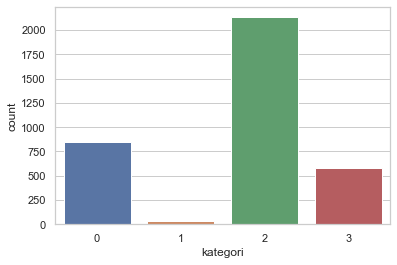

In [107]:
# Visualisasi Data
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
sns.countplot(dataset['kategori'])

#plt.savefig(bar_count_label.png)

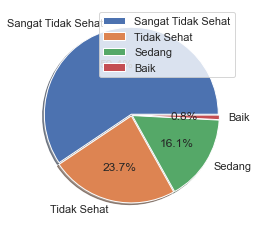

In [108]:
#Data to plot
labels = ['Sangat Tidak Sehat','Tidak Sehat','Sedang','Baik']
explode = (0.01,0.01,0.01,0.01) #explode 1st slice

#plot
fig,ax = plt.subplots()
ax.pie(dataset.kategori.value_counts(), labels=labels, autopct='%.1f%%', explode=explode, shadow=True)
ax.legend(labels,loc='best')
ax.set_aspect('equal')
plt.tight_layout
plt.show()

#plt.savefig('pie.png')

In [109]:
# Menampilkan fitur dataset
dataset.columns

Index(['pm10', 'so2', 'co', 'o3', 'no2', 'kategori'], dtype='object')

In [111]:
# Memisahkan atribut menjadi atribut independen dan dependen 
X = np.array(dataset.drop('kategori', axis=1)) # atribut untuk menentukan variabel dependen / Kelas 
Y = np.array(dataset['kategori']) # variabel dependen / Kelas

In [112]:
X

array([[63.        , 34.        , 25.        , 21.        ,  2.        ],
       [16.        , 32.        , 16.        , 19.        ,  1.        ],
       [18.        , 32.        , 17.        , 20.        ,  2.        ],
       ...,
       [50.1131481 , 23.38267045,  6.        , 49.        ,  8.73406403],
       [50.1131481 , 23.38267045,  6.        , 51.        ,  8.73406403],
       [50.1131481 , 11.        ,  6.        , 34.        ,  2.        ]])

In [113]:
Y

array([2, 0, 0, ..., 0, 2, 0])

In [114]:
# Penskalaan Fitur
sc_X = StandardScaler()
X = sc_X.fit_transform(X)

"""
#cara 1
X_fit = sc.fit(X)
X_std = X_fit.transform(X)

#cara 2
X = sc.fit(X)
X = sc.transform(X)

#cara3
X_std = sc.fit_transform(X)

#On split data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform (X_test)

#You shouldn't be doing fit_transform(X_test) on the test data.
#The fit already occurred above.

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform (X_test)

X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform (X_test)
#Because if X_test = sc.transform(X_test), it returns error X_test is not fitted yet. Or did I miss something here?
"""

"\n#cara 1\nX_fit = sc.fit(X)\nX_std = X_fit.transform(X)\n\n#cara 2\nX = sc.fit(X)\nX = sc.transform(X)\n\n#cara3\nX_std = sc.fit_transform(X)\n\n#On split data\nfrom sklearn.preprocessing import StandardScaler\nsc = StandardScaler()\nX_train = sc.fit_transform(X_train)\nX_test = sc.transform (X_test)\n\n#You shouldn't be doing fit_transform(X_test) on the test data.\n#The fit already occurred above.\n\nsc = StandardScaler()\nX_train = sc.fit_transform(X_train)\nX_test = sc.transform (X_test)\n\nX_train = sc.fit_transform(X_train)\nX_test = sc.fit_transform (X_test)\n#Because if X_test = sc.transform(X_test), it returns error X_test is not fitted yet. Or did I miss something here?\n"

In [115]:
X[0:5]

array([[ 0.7085977 ,  0.91409752,  0.641088  , -1.29557498, -1.26333208],
       [-1.87574889,  0.74190779, -0.23273017, -1.34878238, -1.4509353 ],
       [-1.7657767 ,  0.74190779, -0.13563927, -1.32217868, -1.26333208],
       [-1.43586011,  0.74190779,  0.34981527, -1.32217868, -1.26333208],
       [-1.16092962,  0.74190779,  0.641088  , -1.48180089, -1.26333208]])

In [116]:
from sklearn.model_selection import train_test_split # digunakan untuk memisahkan data pelatihan dan pengujian
# Memisahkan kumpulan data menjadi kumpulan data pelatihan dan pengujian
# splitting the dataset into training set and test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=1)
print('X_train =', X_train.shape, Y_train.shape)
print('Y_train =', X_test.shape, Y_test.shape)

X_train = (2512, 5) (2512,)
Y_train = (1077, 5) (1077,)


### Model SVM

In [117]:
from sklearn.svm import SVC #untuk proses klasifikasi dalam algoritma SVM
from sklearn.neighbors import KNeighborsClassifier #untuk proses klasifikasi dalam algoritma K-NN

#Proses melatih model
#Mengaktifkan/memanggil/membuat fungsi klasifikasi Support Vector Machine dengan pemilihan fitur yang akan digunakan
svm = SVC()

"""
Sesuaikan dengan model/Masukkan ke model/Fit the model. Memasukkan data training pada fungsi klasifikasi SVM.
Masukan dalam bentuk parameter yang berisi X_train (kumpulan data pelatihan yang bersifat independen), y_train (kumpulan label 
untuk semua data di X_train yang bersifat dependen yang perlu diprediksi oleh model)

Cocokkan semua transformasi satu demi satu dan transformasikan data, kemudian set data yang ditransformasi menggunakan 
estimator akhir.
"""
#Fitting model dimana model belajar untuk mencari hubungan antara X_train dan y_train 
svm.fit(X_train,Y_train)

SVC()

In [118]:
from sklearn.model_selection import KFold #Untuk proses KFoldValidation
from sklearn.model_selection import cross_val_score, cross_validate #untuk proses validasi dengan nilai perulangan sesuai nilai K

cv = KFold(n_splits=10, shuffle=True, random_state=1)
accuracy = cross_validate(svm, X_train, Y_train, cv = cv, return_train_score=True)
print('cross validation score', accuracy)

waktu_train = accuracy['fit_time'].mean()
waktu_test = accuracy['score_time'].mean()
train_score = accuracy['train_score'].mean()
validate_score = accuracy['test_score'].mean()
print("====================")
print(waktu_train)
print(waktu_test)
print(train_score)
print(validate_score)

cross validation score {'fit_time': array([0.09432483, 0.10372162, 0.09877419, 0.09873915, 0.10372615,
       0.10167575, 0.10272527, 0.10374093, 0.10277987, 0.09873891]), 'score_time': array([0.00897455, 0.00897813, 0.00789785, 0.00897527, 0.00897455,
       0.00804329, 0.00897527, 0.00992012, 0.00897241, 0.00897336]), 'test_score': array([0.93253968, 0.9484127 , 0.94023904, 0.92430279, 0.93227092,
       0.92031873, 0.93625498, 0.92828685, 0.93227092, 0.92828685]), 'train_score': array([0.94646018, 0.94778761, 0.95090668, 0.94604157, 0.95179124,
       0.94604157, 0.94559929, 0.95002211, 0.95179124, 0.94648386])}
0.10089466571807862
0.00886847972869873
0.9482925363904293
0.9323183456649591


In [119]:
from sklearn import metrics 
from sklearn.metrics import classification_report #untuk proses menampilkan evaluasi
from sklearn.metrics import accuracy_score #untuk proses menampilkan hasil akurasi dari proses model klasifikasi
from sklearn.metrics import precision_recall_curve #untuk proses menampilkan hasil presisi dan recall dari proses model klasifikasi
from sklearn.metrics import f1_score #untuk proses menampilkan hasil f1-score dari proses model klasifikasi
from sklearn.metrics import roc_curve, auc #untuk proses menampilkan hasil Area Hitung di Bawah Kurva Karakteristik Operasi 

In [120]:
"""
Perhitungan nilai evaluasi dihasilkan setelah proses validasi, yang dimana dari proses pelatihan, divalidasi dengan data 
testing yang sudah disiapkan kemudian menghasilkan nilai evaluasi seperti classification report atau metrik performa akurasi, 
presisi, recall, f1-score
"""

#Menentukan hasil prediksi dari X_test
#get predictions from model 
#Selanjutnya melakukan pengujian mengenai keakuratan model SVM terhadap data yang ada, prosesnya dilakukan dengan memprediksi
#data setelah proses training yang diprediksi oleh model
y_pred_svm = svm.predict(X_test)
y_pred_train = svm.predict(X_train)

"""
Setelah proses klasifikasi selesai, diperlukan adanya evaluasi untuk menentukan kualitas metode yang telah berhasil dibuat pada 
tahap sebelumnya. Pada tahap evaluasi ini metrik performa accuracy, precision, recall, dan F1-Score akan digunakan untuk menguji 
kinerja proses klasifikasi yang ditampilkan melalui function classification_report dimana berisi parameter masukan yaitu y_test
(kumpulan label dari semua data di X_test;data pengujian) dan y_pred_svm (proses prediksi kumpulan data pengujian (X_test) yang
bersifat variabel independen)
"""
# Classify and report the results
print(classification_report(Y_test, y_pred_svm))
print('\n')

#print('BEST SVM MODEL')
print('Accuracy Score - SVM:', metrics.accuracy_score(Y_test, y_pred_svm)) 

print('Train Score - SVM:', metrics.accuracy_score(Y_train, y_pred_train)) 
print('Test Score - SVM:', metrics.accuracy_score(Y_test, y_pred_svm)) 

              precision    recall  f1-score   support

           0       0.91      0.84      0.88       260
           1       0.00      0.00      0.00         7
           2       0.92      0.96      0.94       654
           3       0.94      0.93      0.94       156

    accuracy                           0.92      1077
   macro avg       0.69      0.68      0.69      1077
weighted avg       0.92      0.92      0.92      1077



Accuracy Score - SVM: 0.9238625812441968
Train Score - SVM: 0.9498407643312102
Test Score - SVM: 0.9238625812441968


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Model K-NN

In [121]:
knn = KNeighborsClassifier(n_neighbors = 10)
knn.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=10)

In [123]:
from sklearn.model_selection import KFold #Untuk proses KFoldValidation
from sklearn.model_selection import cross_val_score, cross_validate #untuk proses validasi dengan nilai perulangan sesuai nilai K

cv = KFold(n_splits=10, shuffle=True, random_state=1)
accuracy = cross_validate(knn, X_train, Y_train, cv = cv, return_train_score=True)
print('cross validation score', accuracy)

waktu_train = accuracy['fit_time'].mean()
waktu_test = accuracy['score_time'].mean()
train_score = accuracy['train_score'].mean()
validate_score = accuracy['test_score'].mean()
print("====================")
print(waktu_train)
print(waktu_test)
print(train_score)
print(validate_score)

cross validation score {'fit_time': array([0.00749803, 0.00698042, 0.00698137, 0.00598192, 0.00598288,
       0.00598311, 0.0060029 , 0.00598407, 0.00599742, 0.00598955]), 'score_time': array([0.02992105, 0.0259316 , 0.02592993, 0.02393675, 0.02493525,
       0.02622938, 0.02392387, 0.0249331 , 0.02891183, 0.02393031]), 'test_score': array([0.91269841, 0.92857143, 0.88446215, 0.88844622, 0.92828685,
       0.92430279, 0.92430279, 0.89641434, 0.91633466, 0.88446215]), 'train_score': array([0.92433628, 0.92079646, 0.92481203, 0.9230429 , 0.92392747,
       0.92171605, 0.91773552, 0.92038921, 0.91862008, 0.92083149])}
0.006338167190551758
0.025858306884765626
0.9216207489050581
0.9088281793461075


In [125]:
y_pred_knn = knn.predict(X_test)
y_pred_train = knn.predict(X_train)

# Classify and report the results
print(classification_report(Y_test, y_pred_knn))
print('\n')

#print('BEST SVM MODEL')
print('Accuracy Score - K-NN:', metrics.accuracy_score(Y_test, y_pred_knn)) 

print('Train Score - K-NN:', metrics.accuracy_score(Y_train, y_pred_train)) 
print('Test Score - K-NN:', metrics.accuracy_score(Y_test, y_pred_knn)) 

              precision    recall  f1-score   support

           0       0.87      0.85      0.86       260
           1       1.00      0.29      0.44         7
           2       0.88      0.95      0.92       654
           3       0.96      0.73      0.83       156

    accuracy                           0.89      1077
   macro avg       0.93      0.70      0.76      1077
weighted avg       0.89      0.89      0.89      1077



Accuracy Score - K-NN: 0.8904363974001857
Train Score - K-NN: 0.9231687898089171
Test Score - K-NN: 0.8904363974001857


In [135]:
y_pred_svm[0:511]

array([2, 3, 2, 2, 2, 2, 2, 2, 2, 0, 3, 3, 3, 2, 0, 0, 0, 0, 2, 2, 2, 2,
       0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 3, 0, 3, 2, 3, 2, 0, 2, 2, 3, 2, 2,
       2, 2, 2, 2, 2, 0, 0, 2, 3, 3, 2, 2, 3, 3, 3, 0, 2, 2, 2, 3, 2, 0,
       2, 2, 2, 2, 3, 0, 2, 0, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 0, 2,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 3, 3, 3, 2, 2, 3, 2, 2, 2, 2,
       2, 2, 2, 0, 2, 3, 2, 2, 0, 2, 2, 3, 2, 0, 0, 2, 2, 3, 2, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 3, 2, 0, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0,
       2, 2, 0, 3, 0, 2, 2, 0, 3, 0, 2, 2, 0, 2, 0, 2, 3, 3, 2, 0, 0, 0,
       0, 2, 0, 0, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 3, 2, 2, 0, 2, 2, 2,
       2, 3, 2, 3, 2, 2, 2, 3, 2, 2, 2, 3, 2, 2, 0, 2, 2, 3, 0, 0, 0, 2,
       2, 2, 3, 2, 2, 3, 2, 2, 3, 2, 3, 2, 3, 2, 2, 2, 2, 0, 3, 2, 2, 0,
       3, 2, 2, 3, 0, 2, 0, 2, 2, 3, 2, 3, 2, 2, 0, 0, 2, 2, 2, 2, 2, 3,
       2, 3, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0, 2, 2, 3, 2, 2, 2,
       3, 2, 2, 2, 0, 0, 2, 0, 2, 0, 2, 2, 2, 2, 2,

In [136]:
y_pred_knn[0:511]

array([2, 3, 2, 2, 2, 2, 2, 2, 2, 0, 2, 3, 3, 2, 0, 0, 0, 0, 2, 2, 2, 2,
       0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 3, 0, 3, 2, 3, 2, 0, 2, 2, 3, 2, 2,
       2, 2, 2, 2, 2, 0, 0, 2, 3, 2, 2, 2, 3, 2, 3, 0, 2, 2, 2, 3, 2, 0,
       2, 2, 2, 2, 3, 0, 2, 0, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 0, 2,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 3, 2, 3, 2, 2, 3, 2, 2, 2, 2,
       0, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 3, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 3, 2, 0, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0,
       2, 2, 0, 3, 2, 2, 2, 0, 3, 0, 2, 2, 0, 2, 0, 2, 3, 3, 2, 0, 0, 0,
       0, 2, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 3, 2, 2, 2, 3, 2, 2, 2, 3, 0, 2, 0, 2, 2, 3, 0, 0, 0, 2,
       0, 2, 3, 2, 2, 3, 2, 2, 2, 2, 3, 2, 2, 0, 2, 2, 2, 0, 3, 2, 2, 0,
       3, 2, 2, 3, 0, 2, 0, 2, 2, 1, 2, 3, 2, 2, 0, 0, 2, 2, 2, 2, 2, 3,
       0, 3, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0, 2, 2, 3, 2, 2, 2,
       3, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 2, 2, 2,